<a href="https://colab.research.google.com/github/offthetab/ML_homework/blob/main/%D0%9F%D0%A0_3_LogReg_KNN_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#найти и скачать многомерные данные для классификации

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavelgrom123123","key":"0b2c7cf3bdd7f85b75f7f545e9f1df19"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download 'rashikrahmanpritom/heart-attack-analysis-prediction-dataset'

  0% 0.00/4.11k [00:00<?, ?B/s]
100% 4.11k/4.11k [00:00<00:00, 8.02MB/s]


In [ ]:
!unzip heart-attack-analysis-prediction-dataset.zip

Archive:  heart-attack-analysis-prediction-dataset.zip
  inflating: heart.csv               
  inflating: o2Saturation.csv        


In [ ]:
data = pd.read_csv("heart.csv")
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#предобработать, проверить выбросы, пропуски, есть ли дисбаланс классов и прочее

In [ ]:
data.isna().sum() # проверяем наличие na-значений
# na-значения отсутсвуют

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.output.value_counts()

# дизбаланс классов не наблюдается, так как присутсвует примерно одинаковое кол-во "1" и "0"

1    165
0    138
Name: output, dtype: int64

In [ ]:
# необходимо проверить наличие выбросов (диаграмма рассеивания или box plot), и убрать выбросы
# вероятно можно нормировать данные но тут хз
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go



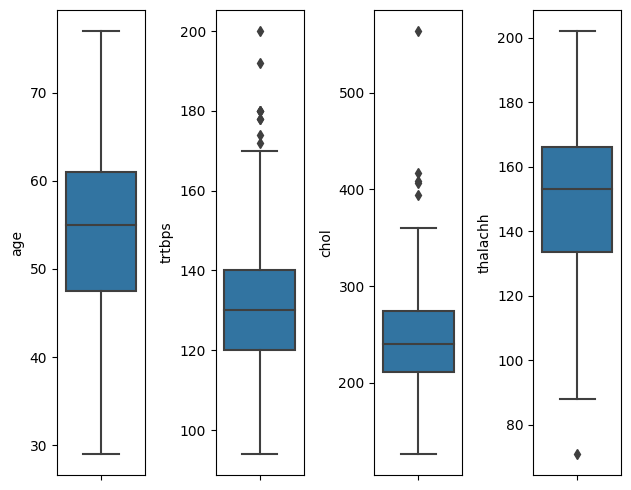

In [ ]:
# Проверяем наличие выбросов в вещественных данных
# в столбцах 'trtbps' 'chol' 'thalachh' 'oldpeak' имеются выбросы, которые необходимо обработать

X = data.copy().drop(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'output', 'thall', 'oldpeak'], axis = 1)

features = X.columns.tolist()
plt.figure(figsize=(8,5))

for i,col in enumerate(features):
    plt.subplot(1,5,i + 1)
    sns.boxplot(y=col, data=data)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

In [ ]:
import scipy.stats as stats

In [ ]:
df_sub = data.loc[:, ['trtbps', 'chol', 'thalachh']]

In [ ]:
# Удаляем выбросы, но почему-то это плохо работает

iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)

print(df_sub.quantile(0.25), df_sub.quantile(0.75), iqr)

lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22
data.loc[:, ['trtbps', 'chol', 'thalachh']] = df_sub.where(lim, np.nan)
data.dropna(inplace=True)


trtbps      120.0
chol        211.0
thalachh    133.5
Name: 0.25, dtype: float64 trtbps      140.0
chol        274.5
thalachh    166.0
Name: 0.75, dtype: float64 trtbps      20.0
chol        63.5
thalachh    32.5
dtype: float64


In [ ]:
data.shape
data.output.value_counts()
# После удаления выбросов появляется дизбаланс классов!!

1    160
0    130
Name: output, dtype: int64

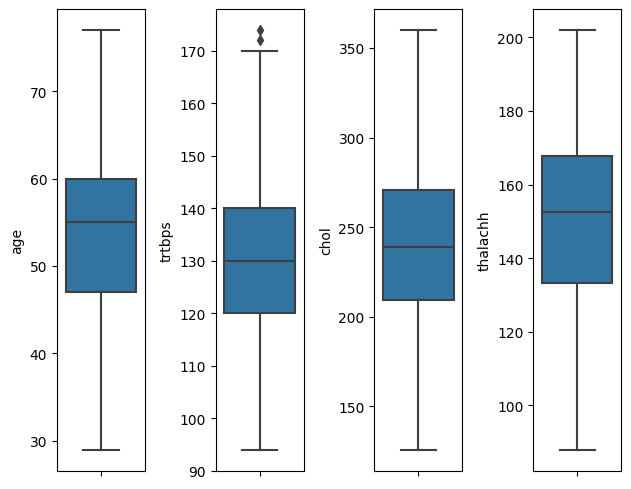

In [ ]:
X = data.copy().drop(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'output', 'thall', 'oldpeak'], axis = 1)

features = X.columns.tolist()
plt.figure(figsize=(8,5))

for i,col in enumerate(features):
    plt.subplot(1,5,i + 1)
    sns.boxplot(y=col, data=data)
    #plt.ylabel('')

plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
#разделить на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('output', axis=1),
    data['output'],
    test_size=0.3,
    random_state=1,
    shuffle=True
)

In [ ]:
# нормализация данных



# Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

[[35  8]
 [ 3 41]]


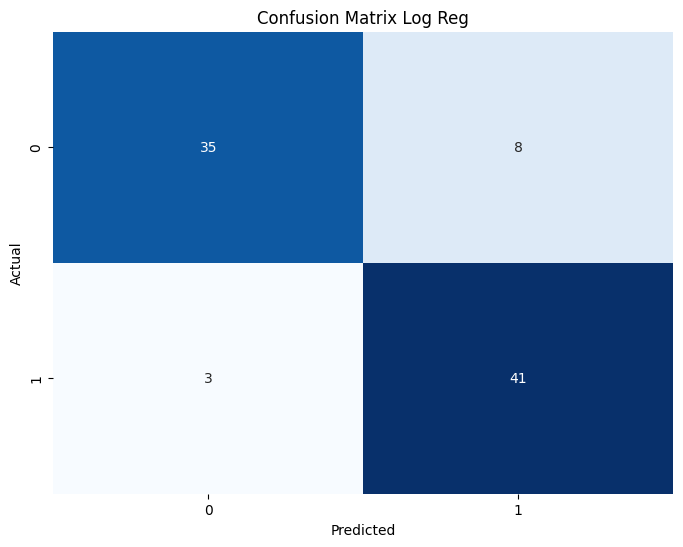

In [ ]:
# Вывод матрицы ошибок
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

# TN FP чем больше значения на главной диагонали, тем лучше
# FN TP

# accuracy = (TN + TP) / (N + P) плохо работает на несбалансированных классах
# precision = TP / (TP + FP) сколько реальных объектов класса среди всех тех, что классификатор отнес к этому классу
# recall = TP / (TP + FN) какую долю положительных объектов распознает классификатор
# F1 2 * presition * recall / (presision + recall) хорошо работает в случае несбалансированных выборок

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Log Reg')
plt.show()

In [ ]:
# вывод матрик accuracy, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.84      0.93      0.88        44

    accuracy                           0.87        87
   macro avg       0.88      0.87      0.87        87
weighted avg       0.88      0.87      0.87        87



RP-AUC: 0.8968255952789326


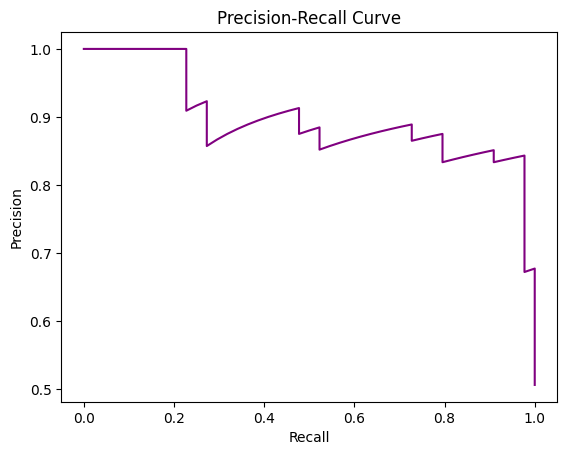

In [ ]:
# RP curve
from sklearn.metrics import precision_recall_curve, auc
y_score = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

print("RP-AUC:", auc_precision_recall)

plt.show()

ROC-AUC: 0.9170190274841438


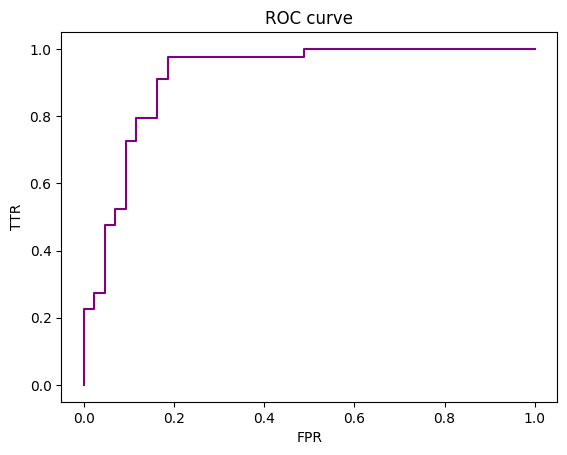

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
y_score = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(fpr,tpr, color='purple')

#add axis labels to plot
ax.set_title('ROC curve')
ax.set_ylabel('TTR')
ax.set_xlabel('FPR')

print("ROC-AUC:", auc)

plt.show()

In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок
#может пригодиться from sklearn.metrics import classification_report


from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# для построения кривых можно воспользоваться from sklearn.preprocessing import label_binarize
# для построения кривых необходимо использовать метки тергета 0 и 1 в качестве первого аргумента
# и вероятности попадания в класс, можно получить, используя predict_proba

classification_report

Support: количество наблюдений для каждого класса

Подходы к усреднению метрик

micro = accuracy (сумма верных срабатываний для всех классов, деленная на все объекты)

Macro avg: среднее арифметическое показателя между классами

weighted avg: средневзвешенное значение рассчитывается путем произведения оценки показателя каждого класса на его количество наблюдений, последующее суммирование результата и деление результата на сумму наблюдений

Зачем?

* Удобно, когда классов очень много
* micro - когда классы сбалансированы
* macro - каждому классу даем одинаковый вес, вне зависимости от дисбаланса классов, хорошо использовать, если нам важен меньший класс, например, мошеннические транзакции, которых мало, а хороших транзакций много, при плохой модели мы получим низкую macro метрику
* weighted - учитываем размер каждого класса, даем класса вес, согласно их количеству. Если меньший класс нам не важен, то мы можем им принебречь при подсчете метрики. Если macro сильно среагирует на ошибки на малом классе, то weighted нет.


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# использовать алгоритм KNN из sklearn

In [ ]:
number_of_neighbors = np.arange(30) #количество соседей для перебора
#инициализировать модель
knn = KNeighborsClassifier()
param_grid={'n_neighbors': number_of_neighbors}
grid_search = GridSearchCV(knn,param_grid , cv=10, scoring='f1')#использовать GridSearchCV для поиска оптимального гиперпараметра

print(param_grid)

{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [ ]:
grid_search.fit(X_train, y_train) #обучение модели

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='f1')

In [ ]:
grid_search.best_estimator_ # лучшая модель получается при k = ?

KNeighborsClassifier(n_neighbors=23)

In [ ]:
grid_search.best_score_

0.7737179487179487

In [ ]:
y_pred = grid_search.predict(X_test) # результат работы модели на тесте

In [ ]:
#вывести метрики accuracy, f1-score, PR и ROC кривые, PR и ROC AUC, матрицу ошибок

[[21 22]
 [ 9 35]]


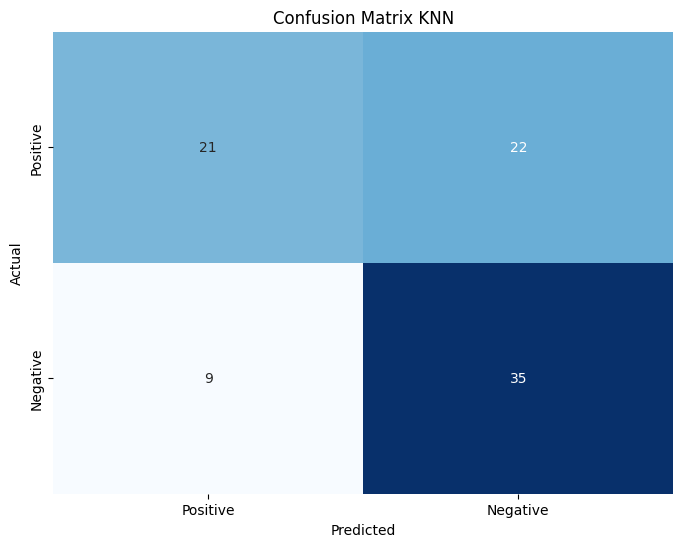

In [ ]:
# Вывод матрицы ошибок
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

# TP FP чем больше значения на главной диагонали, тем лучше
# FN TN

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
# вывод матрик accuracy, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.49      0.58        43
           1       0.61      0.80      0.69        44

    accuracy                           0.64        87
   macro avg       0.66      0.64      0.63        87
weighted avg       0.66      0.64      0.63        87



RP-AUC: 0.6227021986811221


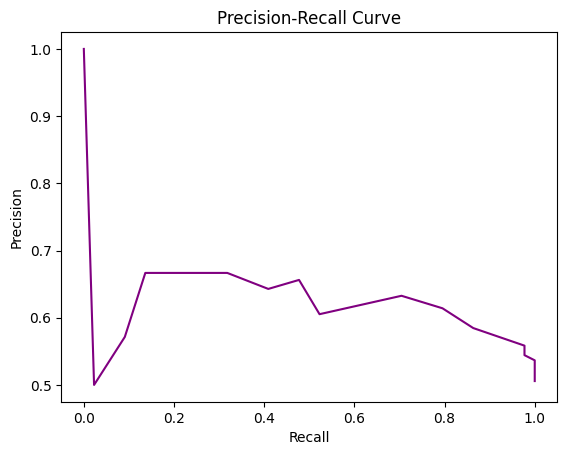

In [ ]:
# RP curve
from sklearn.metrics import precision_recall_curve, auc
y_score = grid_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

print("RP-AUC:", auc_precision_recall)

plt.show()

ROC-AUC: 0.6728329809725159


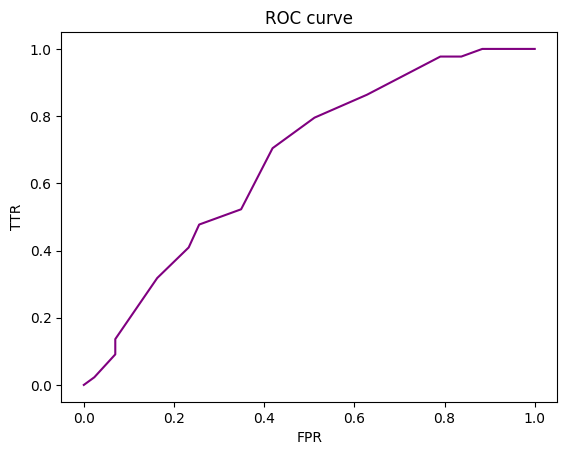

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_score = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(fpr,tpr, color='purple')

#add axis labels to plot
ax.set_title('ROC curve')
ax.set_ylabel('TTR')
ax.set_xlabel('FPR')

print("ROC-AUC:", auc)

plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#использовать SVM для решения задачи классификации
param_kernel = ('linear', 'rbf', "poly", "sigmoid") # ядра

svc = SVC(probability=True)

param_grid={'kernel': param_kernel}
grid_search = GridSearchCV(svc,param_grid , cv=10, scoring='f1')#использовать GridSearchCV для поиска оптимального гиперпараметра

#аналогично как и для KNN, найти оптимальное ядро
#вывести метрики

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='f1')

In [ ]:
grid_search.best_estimator_

SVC(kernel='linear', probability=True)

In [ ]:
grid_search.best_score_

0.8260555820990604

In [ ]:
y_pred = grid_search.predict(X_test) # результат работы модели на тесте

[[35  8]
 [ 4 40]]


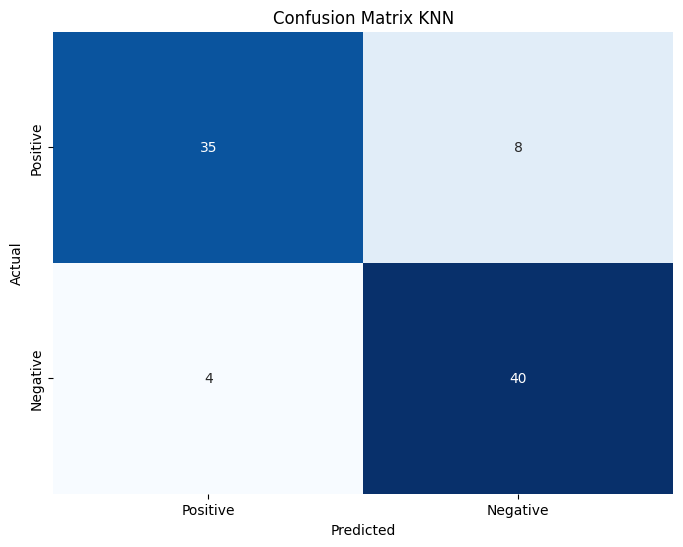

In [ ]:
# Вывод матрицы ошибок
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

# TP FP чем больше значения на главной диагонали, тем лучше
# FN TN

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Positive', 'Negative'],
            yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

In [ ]:
# вывод матрик accuracy, f1-score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        43
           1       0.83      0.91      0.87        44

    accuracy                           0.86        87
   macro avg       0.87      0.86      0.86        87
weighted avg       0.87      0.86      0.86        87



RP-AUC: 0.9036769777066564


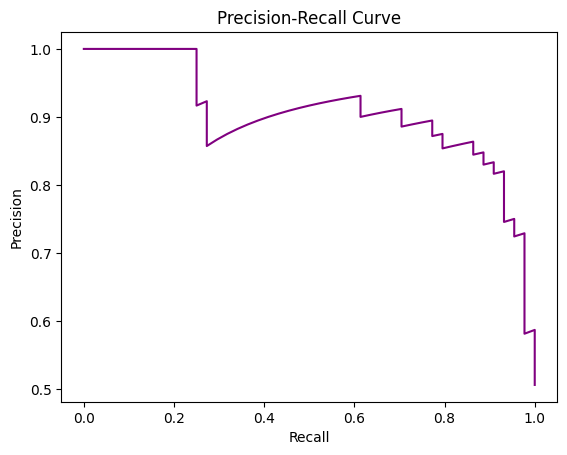

In [ ]:
# RP curve
from sklearn.metrics import precision_recall_curve, auc
y_score = grid_search.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

print("RP-AUC:", auc_precision_recall)

plt.show()

ROC-AUC: 0.9138477801268499


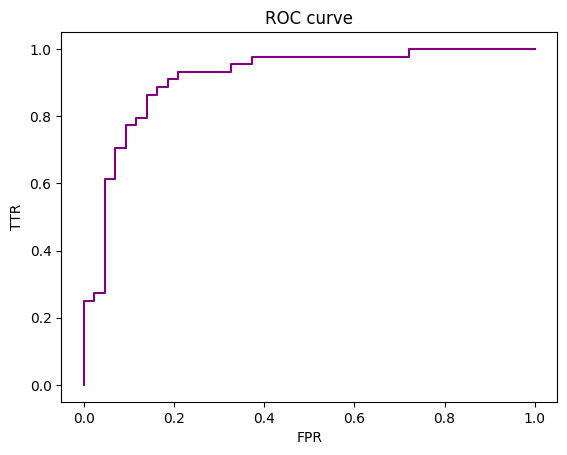

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_score = grid_search.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_score)
auc = roc_auc_score(y_test, y_score)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(fpr,tpr, color='purple')

#add axis labels to plot
ax.set_title('ROC curve')
ax.set_ylabel('TTR')
ax.set_xlabel('FPR')

print("ROC-AUC:", auc)

plt.show()